## training mlp (keras)

In [91]:
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from sklearn import preprocessing
import matplotlib.pyplot as plt
from keras.layers import Dense
import pandas as pd
import numpy as np
import random
import time

1-1.load

In [2]:
df = pd.read_csv('mnist.csv')
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(10000, 785)

In [4]:
x = df.drop('label', axis=1)
y = df['label']

In [5]:
x.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y.describe()

count    10000.000000
mean         4.443400
std          2.895865
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: label, dtype: float64

1-2.normalize the dataset

In [7]:
mean = x.mean(axis=0)
std = x.std(axis=0) + 1e-9

x = (x - mean) / std
x = pd.DataFrame(x)
x.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031599,-0.028521,-0.021736,-0.01,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031599,-0.028521,-0.021736,-0.01,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031599,-0.028521,-0.021736,-0.01,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031599,-0.028521,-0.021736,-0.01,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031599,-0.028521,-0.021736,-0.01,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
x.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.842171e-18,1.634248e-17,1.421085e-18,3.552714e-19,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.159945e-02,-2.852126e-02,-2.173550e-02,-1.000000e-02,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.159945e-02,-2.852126e-02,-2.173550e-02,-1.000000e-02,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.159945e-02,-2.852126e-02,-2.173550e-02,-1.000000e-02,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.159945e-02,-2.852126e-02,-2.173550e-02,-1.000000e-02,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.455658e+01,4.407831e+01,6.444097e+01,9.999000e+01,0.0,0.0,0.0,0.0,0.0,0.0


2- split dataset into train/validation(20%)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45, stratify=y)

In [10]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [11]:
x_train.shape

(6400, 784)

In [12]:
x_test.shape

(2000, 784)

In [13]:
x_validation.shape

(1600, 784)

In [14]:
y_train = to_categorical(y_train, 10)
y_validation = to_categorical(y_validation, 10)
y_test = to_categorical(y_test, 10)

3-design mlp arch, one input layer, two hidden layers(128, 64 neurons), output layer, use ReLU as activation function for hidden and softmax for output

In [15]:
def define_sequantial_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(28*28,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

4-1.training based on SGD, mini-batch SGD (size_batch=64), batch SGD (epochs=50) + learning_rate=0.01

In [16]:
model = define_sequantial_model()

/home/mina/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
def training_sequantial_model(model, size):
    history = model.fit(x_train, y_train, epochs=50, batch_size=size, validation_data=(x_validation, y_validation))
    return history

In [19]:
def plot_learning_curves(history, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='training loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.title(f'{title} - loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='training accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.title(f'{title} - accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()

    plt.show()

sgd

In [20]:
sgd_model = define_sequantial_model()

sgd_time_start = time.time()
sgd_model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
sgd_history = training_sequantial_model(sgd_model, 1)
sgd_time_end = time.time()

sgd_time = sgd_time_end - sgd_time_start

Epoch 1/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.7855 - loss: 0.7282 - val_accuracy: 0.9237 - val_loss: 0.3119
Epoch 2/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9301 - loss: 0.2415 - val_accuracy: 0.9262 - val_loss: 0.3218
Epoch 3/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9511 - loss: 0.1578 - val_accuracy: 0.9312 - val_loss: 0.2964
Epoch 4/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9645 - loss: 0.1255 - val_accuracy: 0.9294 - val_loss: 0.3509
Epoch 5/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9747 - loss: 0.1111 - val_accuracy: 0.9169 - val_loss: 0.3903
Epoch 6/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9603 - loss: 0.1645 - val_accuracy: 0.9137 - val_loss: 0.4584
Epoch 7/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9652 - loss: 0.2140 - val_accuracy: 0.9156 - val_loss: 0.4530
Epoch 8/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9539 - loss: 0

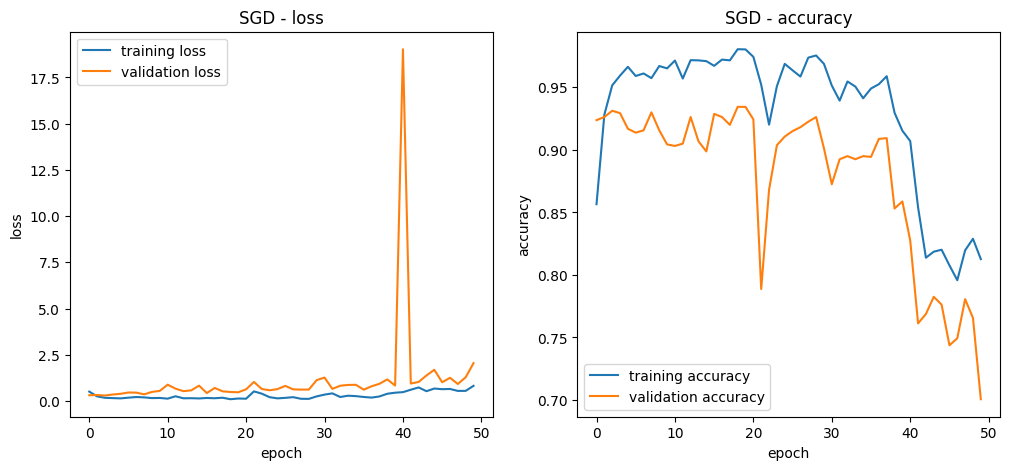

In [21]:
plot_learning_curves(sgd_history, 'SGD')

In [22]:
print('sgd execution time:', sgd_time)

sgd execution time: 596.7567348480225


mini-batch

In [23]:
mini_batch_model = define_sequantial_model()

mini_batch_time_start = time.time()
mini_batch_model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
mini_batch_history = training_sequantial_model(mini_batch_model, 64)
mini_batch_time_end = time.time()

mini_batch_time = mini_batch_time_end - mini_batch_time_start

/home/mina/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3165 - loss: 2.0561 - val_accuracy: 0.7138 - val_loss: 1.1478
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7604 - loss: 0.9921 - val_accuracy: 0.8219 - val_loss: 0.7156
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8438 - loss: 0.6193 - val_accuracy: 0.8537 - val_loss: 0.5443
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8875 - loss: 0.4622 - val_accuracy: 0.8737 - val_loss: 0.4578
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8985 - loss: 0.3680 - val_accuracy: 0.8906 - val_loss: 0.4082
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9101 - loss: 0.3338 - val_accuracy: 0.9019 - val_loss: 0.3720
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9242 - loss: 0.2838 - val_accuracy: 0.9081 - val_loss: 0.3479
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9301 - loss: 0.2575 - val_accuracy: 0

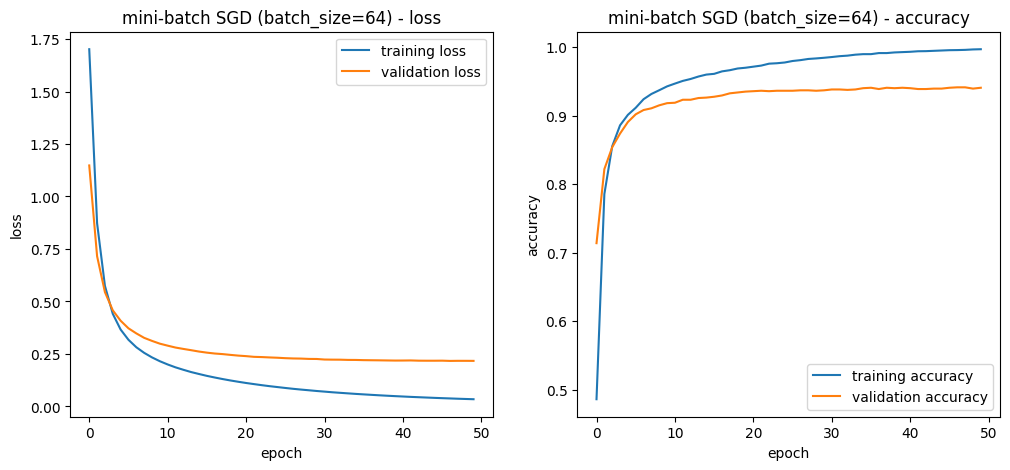

In [24]:
plot_learning_curves(mini_batch_history, 'mini-batch SGD (batch_size=64)')

In [25]:
print('mini batch execution time', mini_batch_time)

mini batch execution time 35.33412313461304


batch

In [26]:
batch_model = define_sequantial_model()

batch_time_start = time.time()
batch_model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
batch_history = training_sequantial_model(batch_model, len(x_train))
batch_time_end = time.time()

batch_time = batch_time_end - batch_time_start

/home/mina/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0920 - loss: 2.7112 - val_accuracy: 0.1044 - val_loss: 2.6610
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.0988 - loss: 2.6686 - val_accuracy: 0.1144 - val_loss: 2.6200
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.1058 - loss: 2.6278 - val_accuracy: 0.1250 - val_loss: 2.5806
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.1144 - loss: 2.5887 - val_accuracy: 0.1300 - val_loss: 2.5428
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.1250 - loss: 2.5512 - val_accuracy: 0.1369 - val_loss: 2.5066
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.1345 - loss: 2.5151 - val_accuracy: 0.1494 - val_loss: 2.4716
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.1452 - loss: 2.4804 - val_accuracy: 0.1612 - val_loss: 2.4379
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.1550 - loss: 2.4468 - val_accuracy: 0.1731 - val_loss: 2.

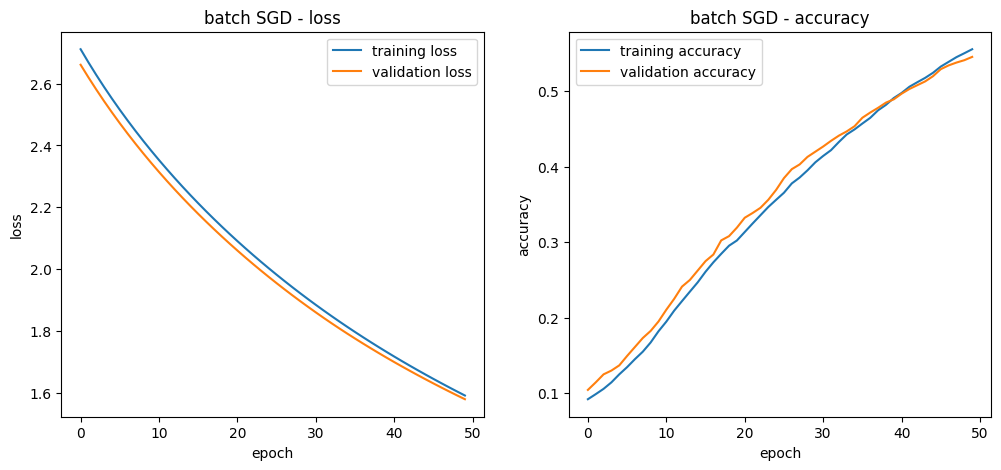

In [27]:
plot_learning_curves(batch_history, 'batch SGD')

In [28]:
print('batch execution time', batch_time)

batch execution time 13.979530572891235


5-comparing between mini-batch, mini batch with decay=1e-6 and SGD (decay=1e-6) and momentum

mini batch with decay

In [29]:
mini_batch_decay_time_start = time.time()

mini_batch_decay_model = define_sequantial_model()
mini_batch_decay_model.compile(optimizer=SGD(learning_rate=0.01, decay=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])
mini_batch_decay_history = training_sequantial_model(mini_batch_decay_model, 64)

mini_batch_decay_time_end = time.time()

mini_batch_decay_time = mini_batch_decay_time_end - mini_batch_decay_time_start

/home/mina/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/mina/anaconda3/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3137 - loss: 2.1022 - val_accuracy: 0.7300 - val_loss: 1.0710
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7746 - loss: 0.9184 - val_accuracy: 0.8375 - val_loss: 0.6614
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8487 - loss: 0.6022 - val_accuracy: 0.8763 - val_loss: 0.5013
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8839 - loss: 0.4552 - val_accuracy: 0.8900 - val_loss: 0.4208
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8995 - loss: 0.3723 - val_accuracy: 0.8956 - val_loss: 0.3720
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9135 - loss: 0.3189 - val_accuracy: 0.9062 - val_loss: 0.3411
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9240 - loss: 0.2821 - val_accuracy: 0.9150 - val_loss: 0.3163
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9334 - loss: 0.2543 - val_accuracy: 0

sgd with decay and momentum

In [30]:
sgd_decay_model = define_sequantial_model()

sgd_decay_time_start = time.time()
sgd_decay_model.compile(optimizer=SGD(learning_rate=0.01, decay=1e-6, momentum=0.8), loss='categorical_crossentropy', metrics=['accuracy'])
sgd_decay_history = training_sequantial_model(sgd_decay_model, 1)
sgd_decay_time_end = time.time()

sgd_decay_time = sgd_decay_time_end - sgd_decay_time_start

/home/mina/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/mina/anaconda3/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.2343 - loss: 2.3843 - val_accuracy: 0.0981 - val_loss: 2.3132
Epoch 2/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.0925 - loss: 2.3124 - val_accuracy: 0.0981 - val_loss: 2.3116
Epoch 3/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.1106 - loss: 2.3113 - val_accuracy: 0.1031 - val_loss: 2.3057
Epoch 4/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.0879 - loss: 2.3172 - val_accuracy: 0.1031 - val_loss: 2.3119
Epoch 5/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.1061 - loss: 2.3121 - val_accuracy: 0.1138 - val_loss: 2.3170
Epoch 6/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.1085 - loss: 2.3108 - val_accuracy: 0.0956 - val_loss: 2.3085
Epoch 7/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.0955 - loss: 2.3135 - val_accuracy: 0.0894 - val_loss: 2.3109
Epoch 8/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.1032 - loss: 2

plot learning curves

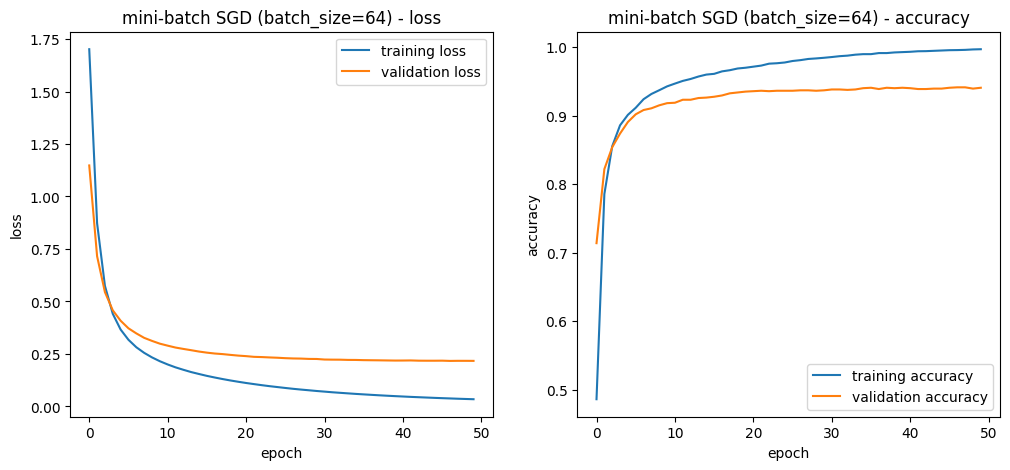

In [39]:
plot_learning_curves(mini_batch_history, 'mini-batch SGD (batch_size=64)')

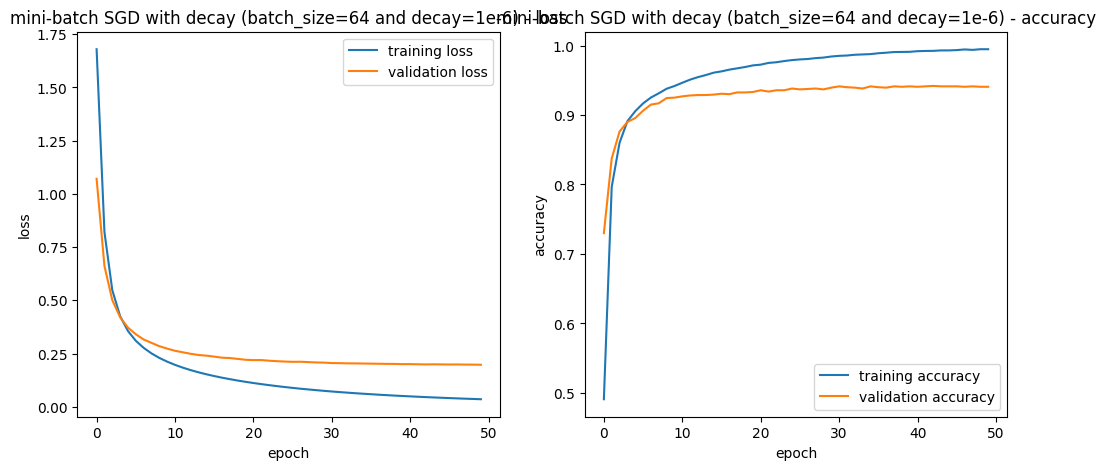

In [40]:
plot_learning_curves(mini_batch_decay_history, 'mini-batch SGD with decay (batch_size=64 and decay=1e-6)')

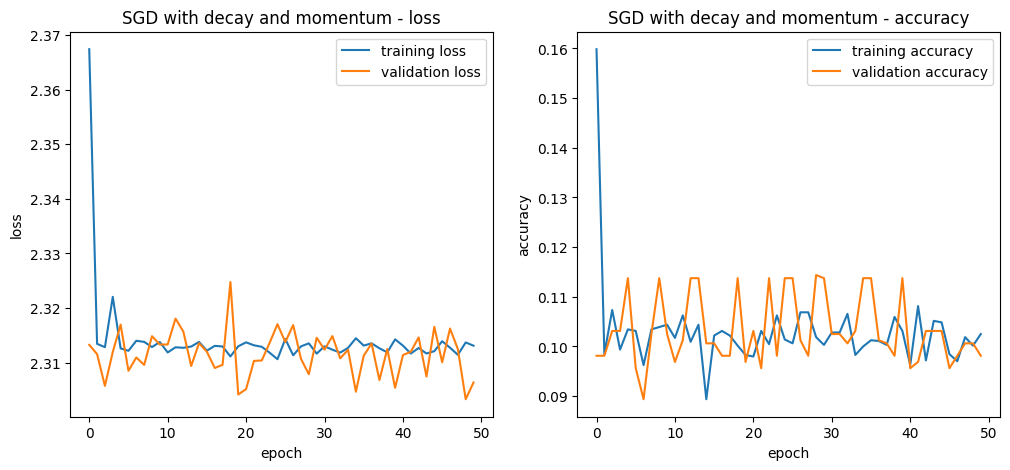

In [41]:
plot_learning_curves(sgd_decay_history, 'SGD with decay and momentum')

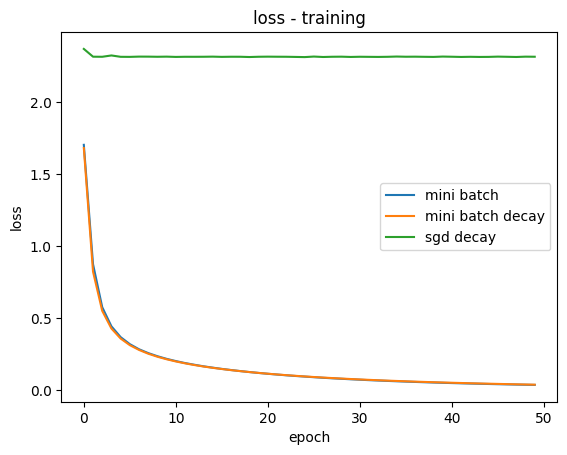

In [34]:
plt.plot(mini_batch_history.history['loss'], label='mini batch')
plt.plot(mini_batch_decay_history.history['loss'], label='mini batch decay')
plt.plot(sgd_decay_history.history['loss'], label='sgd decay')
plt.title('loss - training')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

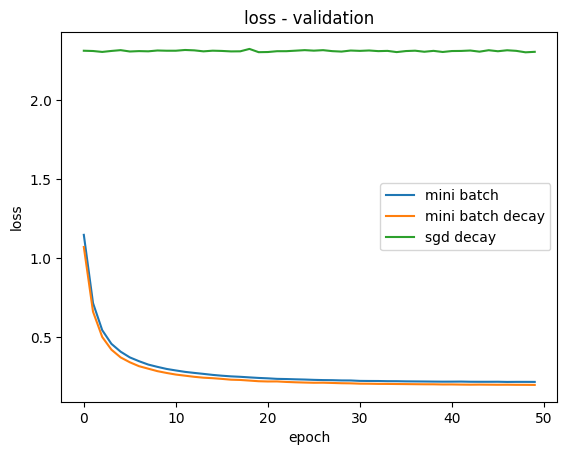

In [35]:
plt.plot(mini_batch_history.history['val_loss'], label='mini batch')
plt.plot(mini_batch_decay_history.history['val_loss'], label='mini batch decay')
plt.plot(sgd_decay_history.history['val_loss'], label='sgd decay')
plt.title('loss - validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

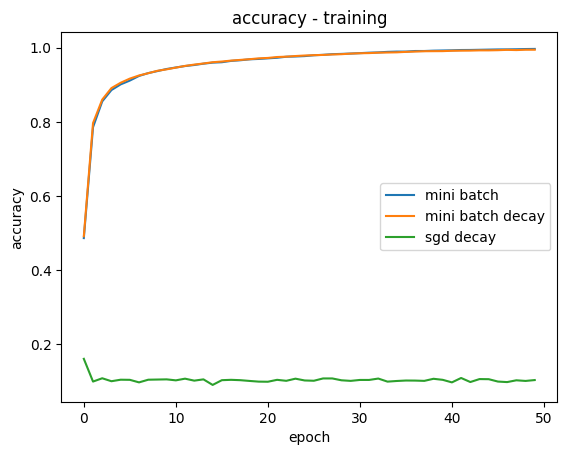

In [36]:
plt.plot(mini_batch_history.history['accuracy'], label='mini batch')
plt.plot(mini_batch_decay_history.history['accuracy'], label='mini batch decay')
plt.plot(sgd_decay_history.history['accuracy'], label='sgd decay')
plt.title('accuracy - training')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

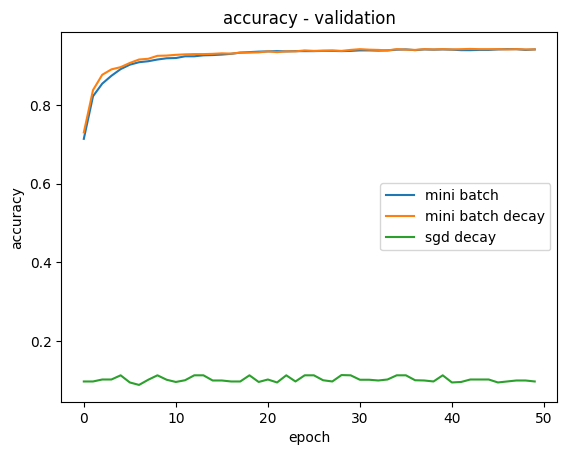

In [37]:
plt.plot(mini_batch_history.history['val_accuracy'], label='mini batch')
plt.plot(mini_batch_decay_history.history['val_accuracy'], label='mini batch decay')
plt.plot(sgd_decay_history.history['val_accuracy'], label='sgd decay')
plt.title('accuracy - validation')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

execution time

In [38]:
print('mini batch execution time:', mini_batch_time)
print('mini batch decay execution time:', mini_batch_decay_time)
print('sgd decay execution time:', sgd_decay_time)

mini batch execution time: 35.33412313461304
mini batch decay execution time: 37.84070706367493
sgd decay execution time: 1081.5777504444122


- mini batch sgd has the shortest execution time (35s)
- sgd with decay and momentum has the longest execution time (18m)
- sgd with decay and momentum has the lowest accuracy and highest loss

6-comprae SGD(learning_rate=0.01), adam(learning_rate=0.001), RmsProp(learning_rate=0.001) optimizers

SGD learning_rate = 0.01

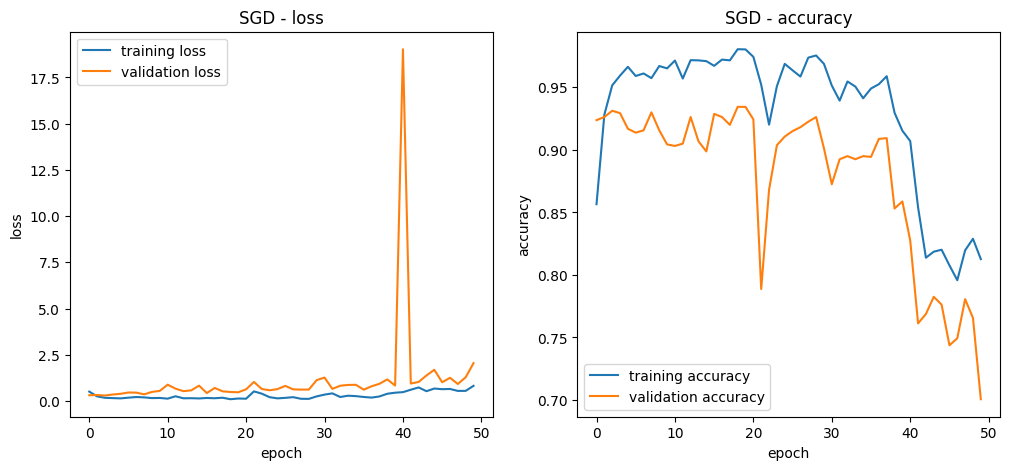

In [44]:
plot_learning_curves(sgd_history, 'SGD')

In [45]:
print('sgd execution time:', sgd_time)

sgd execution time: 596.7567348480225


Adam with learning_rate = 0.001

In [48]:
adam_model = define_sequantial_model()

adam_time_start = time.time()
adam_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
adam_history = training_sequantial_model(adam_model, 1)
adam_time_end = time.time()

adam_time = adam_time_end - adam_time_start

Epoch 1/50


/home/mina/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6400/6400 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7993 - loss: 0.6797 - val_accuracy: 0.9144 - val_loss: 0.2970
Epoch 2/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9304 - loss: 0.2497 - val_accuracy: 0.9062 - val_loss: 0.3987
Epoch 3/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9501 - loss: 0.1747 - val_accuracy: 0.9150 - val_loss: 0.4072
Epoch 4/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9602 - loss: 0.1407 - val_accuracy: 0.9294 - val_loss: 0.3295
Epoch 5/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9684 - loss: 0.1200 - val_accuracy: 0.9200 - val_loss: 0.4670
Epoch 6/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.9684 - loss: 0.1396 - val_accuracy: 0.9425 - val_loss: 0.5073
Epoch 7/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9717 - loss: 0.1576 - val_accuracy: 0.9337 - val_loss: 0.6034
Epoch 8/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9823 - loss: 0.1318 - val

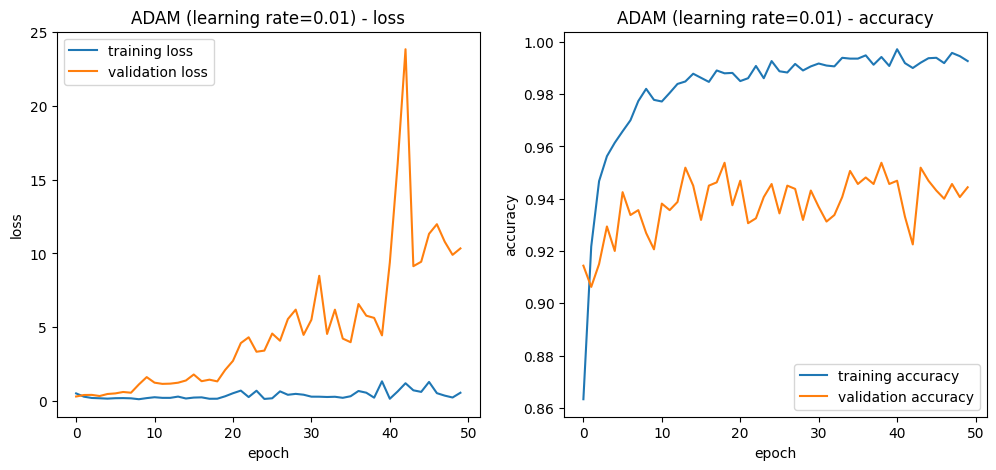

In [50]:
plot_learning_curves(adam_history, 'ADAM (learning rate=0.01)')

In [51]:
print('adam execution time:', adam_time)

adam execution time: 1436.8955035209656


RmsProp with learning_rate = 0.001

In [52]:
rms_model = define_sequantial_model()

rms_time_start = time.time()
rms_model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
rms_history = training_sequantial_model(rms_model, 1)
rms_time_end = time.time()

rms_time = rms_time_end - rms_time_start

/home/mina/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


6400/6400 ━━━━━━━━━━━━━━━━━━━━ 109s 8ms/step - accuracy: 0.8044 - loss: 0.7748 - val_accuracy: 0.9062 - val_loss: 0.7045
Epoch 2/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 79s 7ms/step - accuracy: 0.9425 - loss: 0.3688 - val_accuracy: 0.9181 - val_loss: 0.6610
Epoch 3/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 48s 8ms/step - accuracy: 0.9522 - loss: 0.3929 - val_accuracy: 0.9388 - val_loss: 0.5204
Epoch 4/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 91s 14ms/step - accuracy: 0.9722 - loss: 0.2610 - val_accuracy: 0.9375 - val_loss: 0.7308
Epoch 5/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 107s 17ms/step - accuracy: 0.9798 - loss: 0.1611 - val_accuracy: 0.9281 - val_loss: 1.0037
Epoch 6/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 111s 17ms/step - accuracy: 0.9822 - loss: 0.1840 - val_accuracy: 0.9456 - val_loss: 0.5886
Epoch 7/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 129s 15ms/step - accuracy: 0.9830 - loss: 0.1404 - val_accuracy: 0.9406 - val_loss: 0.8823
Epoch 8/50
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 122s 12ms/step - accuracy: 0.9913 - loss: 0.

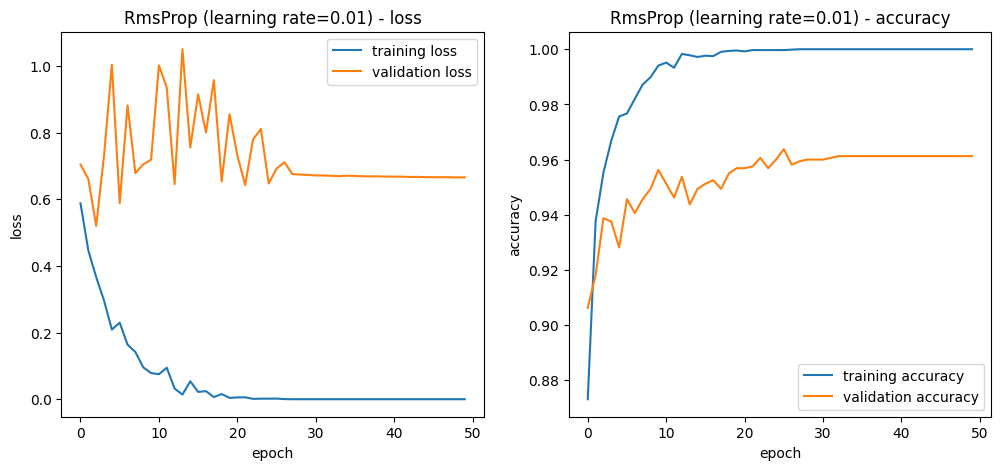

In [53]:
plot_learning_curves(rms_history, 'RmsProp (learning rate=0.01)')

In [54]:
print('RmsProp execution time:', rms_time)

RmsProp execution time: 1488.0516250133514


SGD

In [59]:
def training_sequantial_model_no_batch_size(model):
    history = model.fit(x_train, y_train, epochs=50, validation_data=(x_validation, y_validation))
    return history

In [60]:
default_sgd_model = define_sequantial_model()

default_sgd_time_start = time.time()
default_sgd_model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
default_sgd_history = training_sequantial_model_no_batch_size(default_sgd_model)
default_sgd_time_end = time.time()

default_sgd_time = default_sgd_time_end - default_sgd_time_start

Epoch 1/50


/home/mina/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4677 - loss: 1.6882 - val_accuracy: 0.8275 - val_loss: 0.6603
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8747 - loss: 0.5125 - val_accuracy: 0.8788 - val_loss: 0.4431
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9149 - loss: 0.3412 - val_accuracy: 0.8931 - val_loss: 0.3666
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9292 - loss: 0.2795 - val_accuracy: 0.9000 - val_loss: 0.3239
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9347 - loss: 0.2380 - val_accuracy: 0.9094 - val_loss: 0.2987
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9487 - loss: 0.1945 - val_accuracy: 0.9119 - val_loss: 0.2812
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9541 - loss: 0.1741 - val_accuracy: 0.9125 - val_loss: 0.2676
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9628 - loss: 0.1519 - val_accuracy: 0.9106 - val_

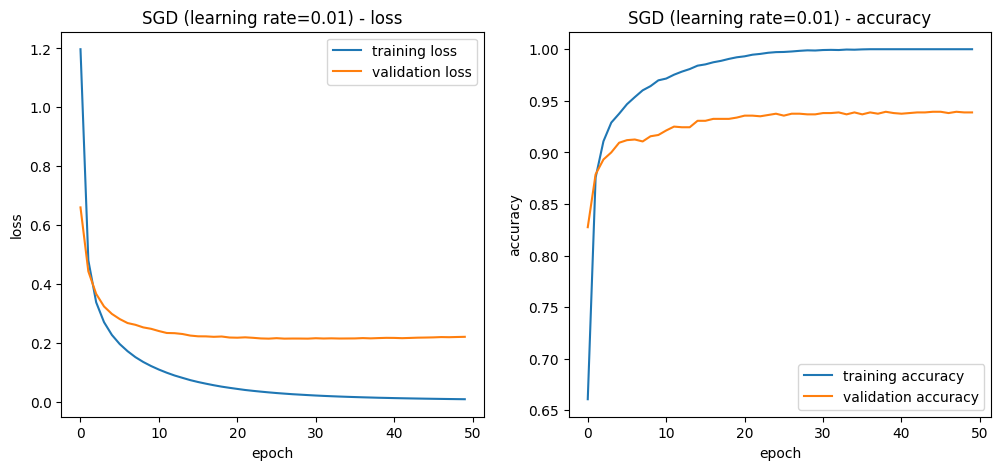

In [62]:
plot_learning_curves(default_sgd_history, 'SGD (learning rate=0.01)')

In [63]:
print('default sgd execution time:', default_sgd_time)

default sgd execution time: 65.7541024684906


Adam

In [64]:
default_adam_model = define_sequantial_model()

default_adam_time_start = time.time()
default_adam_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
default_adam_history = training_sequantial_model_no_batch_size(default_adam_model)
default_adam_time_end = time.time()

default_adam_time = default_adam_time_end - default_adam_time_start

/home/mina/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7284 - loss: 0.9177 - val_accuracy: 0.9225 - val_loss: 0.2778
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9596 - loss: 0.1494 - val_accuracy: 0.9388 - val_loss: 0.2093
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9832 - loss: 0.0666 - val_accuracy: 0.9438 - val_loss: 0.1905
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9935 - loss: 0.0345 - val_accuracy: 0.9406 - val_loss: 0.1905
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9974 - loss: 0.0193 - val_accuracy: 0.9431 - val_loss: 0.2119
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9991 - loss: 0.0108 - val_accuracy: 0.9500 - val_loss: 0.1920
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 0.9481 - val_loss: 0.1948
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0

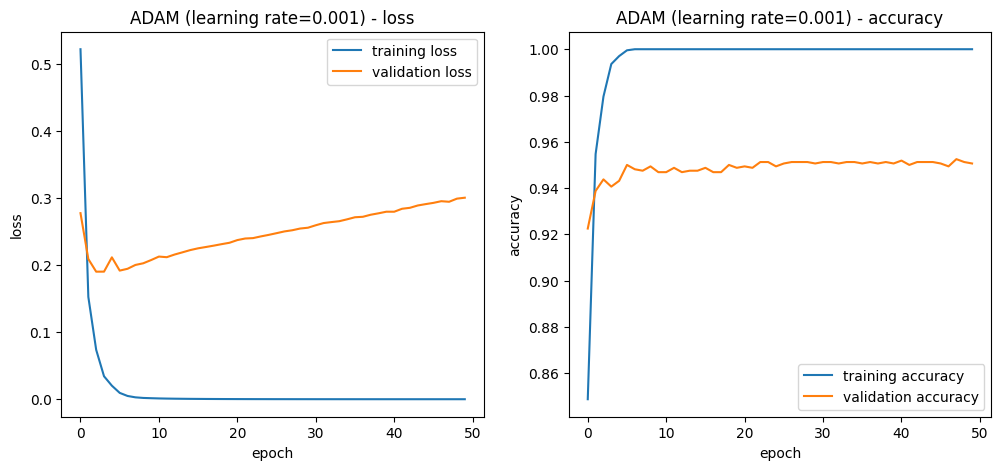

In [65]:
plot_learning_curves(default_adam_history, 'ADAM (learning rate=0.001)')

In [66]:
print('default adam execution time:', default_adam_time)

default adam execution time: 89.9526264667511


RmsProp

In [67]:
default_rms_model = define_sequantial_model()

default_rms_time_start = time.time()
default_rms_model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
default_rms_history = training_sequantial_model_no_batch_size(default_rms_model)
default_rms_time_end = time.time()

default_rms_time = default_rms_time_end - default_rms_time_start

/home/mina/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7686 - loss: 0.7907 - val_accuracy: 0.9200 - val_loss: 0.2785
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9562 - loss: 0.1511 - val_accuracy: 0.9362 - val_loss: 0.2102
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9790 - loss: 0.0747 - val_accuracy: 0.9413 - val_loss: 0.2070
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9888 - loss: 0.0374 - val_accuracy: 0.9444 - val_loss: 0.2123
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9960 - loss: 0.0201 - val_accuracy: 0.9519 - val_loss: 0.2060
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9983 - loss: 0.0104 - val_accuracy: 0.9513 - val_loss: 0.2109
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9994 - loss: 0.0040 - val_accuracy: 0.9525 - val_loss: 0.2297
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9984 - loss: 0.0047 - val_accuracy: 0.

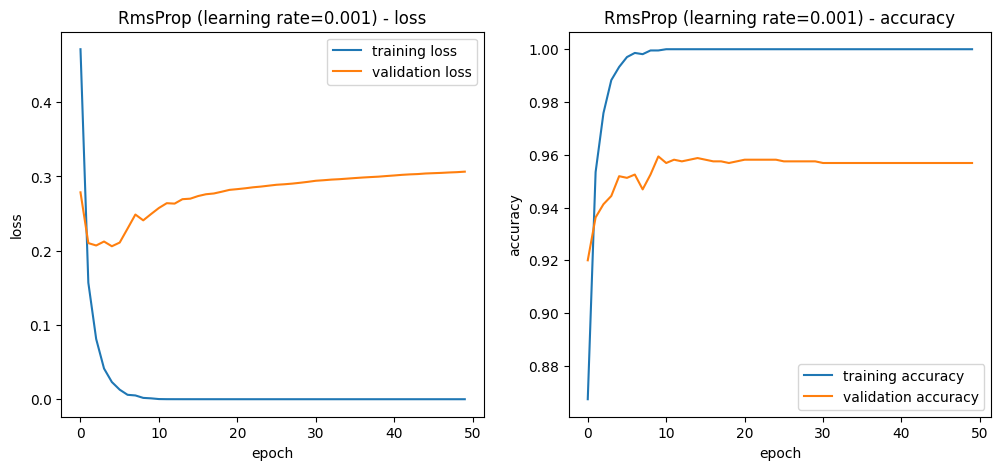

In [68]:
plot_learning_curves(default_rms_history, 'RmsProp (learning rate=0.001)')

In [69]:
print('default rms execution time:', default_rms_time)

default rms execution time: 95.9389283657074


7-1.export best model on validation set

- Adam and RmsProp use dynamic learning rate while training
- SGD converges so fast with good loss/accuracy
- Adam and RmsProp took time more than SGD but RmsProp loss and accuracy converge fast than Adam loss in validation, even that it took the longest execution time

In [78]:
mini_batch_decay_model.save('best_model.keras')

7-2.import the best model

In [79]:
model = load_model('best_model.keras')

7-3.prediction on test set

In [82]:
print("evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("loss: ", results[0])
print("accuracy: ", results[1])

evaluate on test data
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9395 - loss: 0.2153
loss:  0.2325524389743805
accuracy:  0.9409999847412109


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
prediction:  9
label:  9


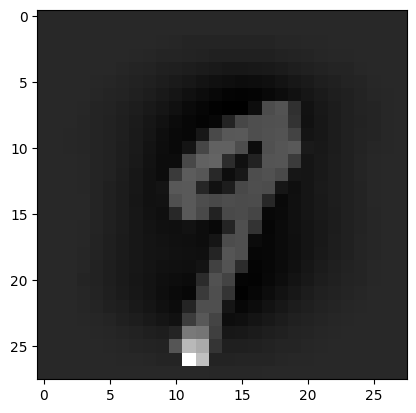

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
prediction:  5
label:  5


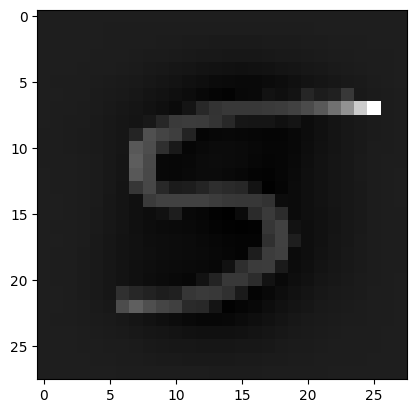

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
prediction:  2
label:  2


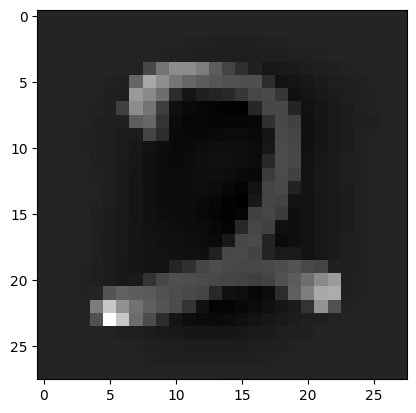

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
prediction:  3
label:  3


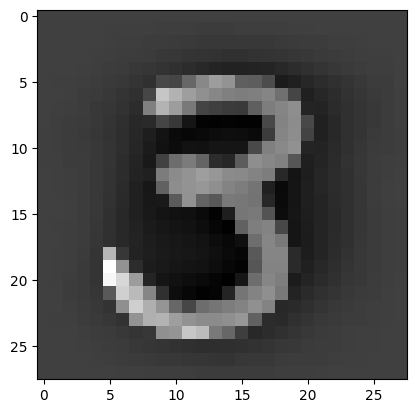

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
prediction:  0
label:  0


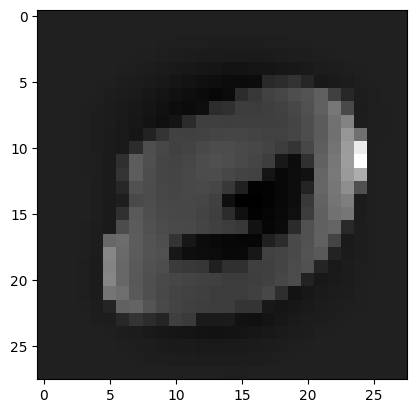

In [96]:
def prediction_function(index):
    current_image = x_test.to_numpy()[index].reshape((28, 28))
    prediction = model.predict(x_test.to_numpy()[index].reshape(1, 784))

    prediction = np.argmax(prediction)
    label = np.argmax(y_test[index])

    print("prediction: ", prediction)
    print("label: ", label)

    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

test_list = random.sample(range(1, 50), 7)
for i in test_list[:5]:
    prediction_function(i)
